# Iteration comparision 0D model on 500 mols of QM9 isomers

In [1]:
import sys, pickle, json
import numpy as np
sys.path.append('../src/')
sys.path.append("../../scripts/")

import matplotlib.pyplot as plt
from plt_config import use_latex, TU_GREY, TU_RED
use_latex()


In [2]:
with open("plot_data/scheme_iterations_0D_model.pkl", "rb") as f:
    scheme_iterations = pickle.load(f)
with open("plot_data/gnn_initial_iterations.json", "rb") as f:
    gnn_iterations = json.load(f)

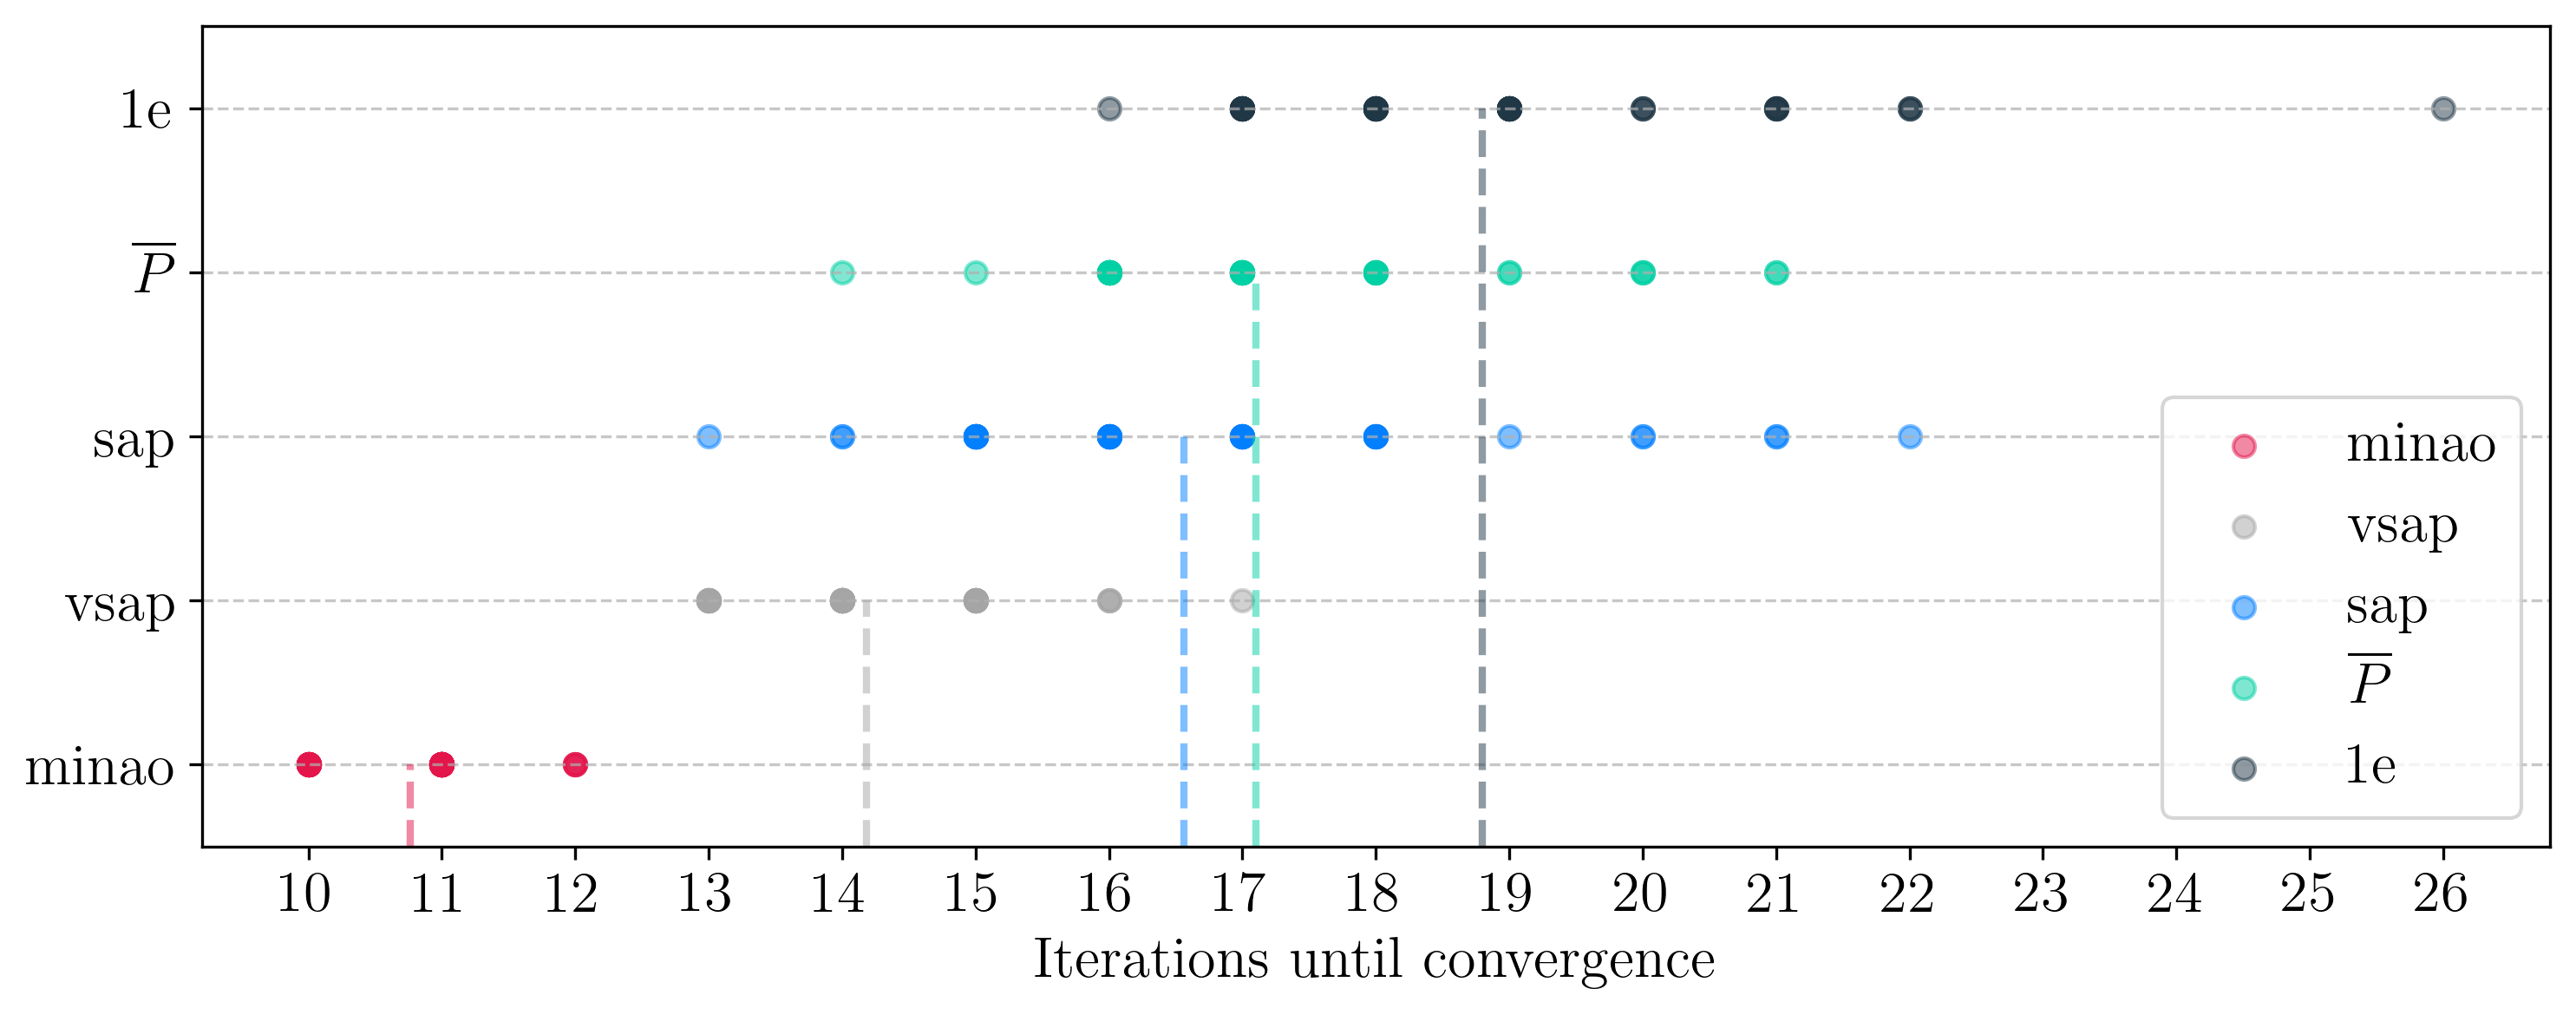

In [3]:
plt.gcf().set_size_inches(10, 4)
for i, (scheme, iterations) in enumerate(scheme_iterations.items()):
    scheme = r"$\overline{P}$" if scheme == "0-D" else scheme
    color = plt.scatter(iterations, [scheme]*len(iterations), label=scheme, alpha=0.5).get_facecolor()[0]
    plt.vlines(np.mean(iterations), ymin=-0.5, ymax=i, colors=[color], linestyles='dashed')
plt.ylim(-0.5, len(scheme_iterations) - 0.5)
plt.xticks(np.arange(10,max([max(iterations) for iterations in scheme_iterations.values()]) + 1, 1))
plt.xlabel("Iterations until convergence")
plt.grid(axis="x")
plt.legend(loc="lower right")
plt.tight_layout()
plt.savefig("../../fig/gnn/0_d_model_iteration_count.pdf")

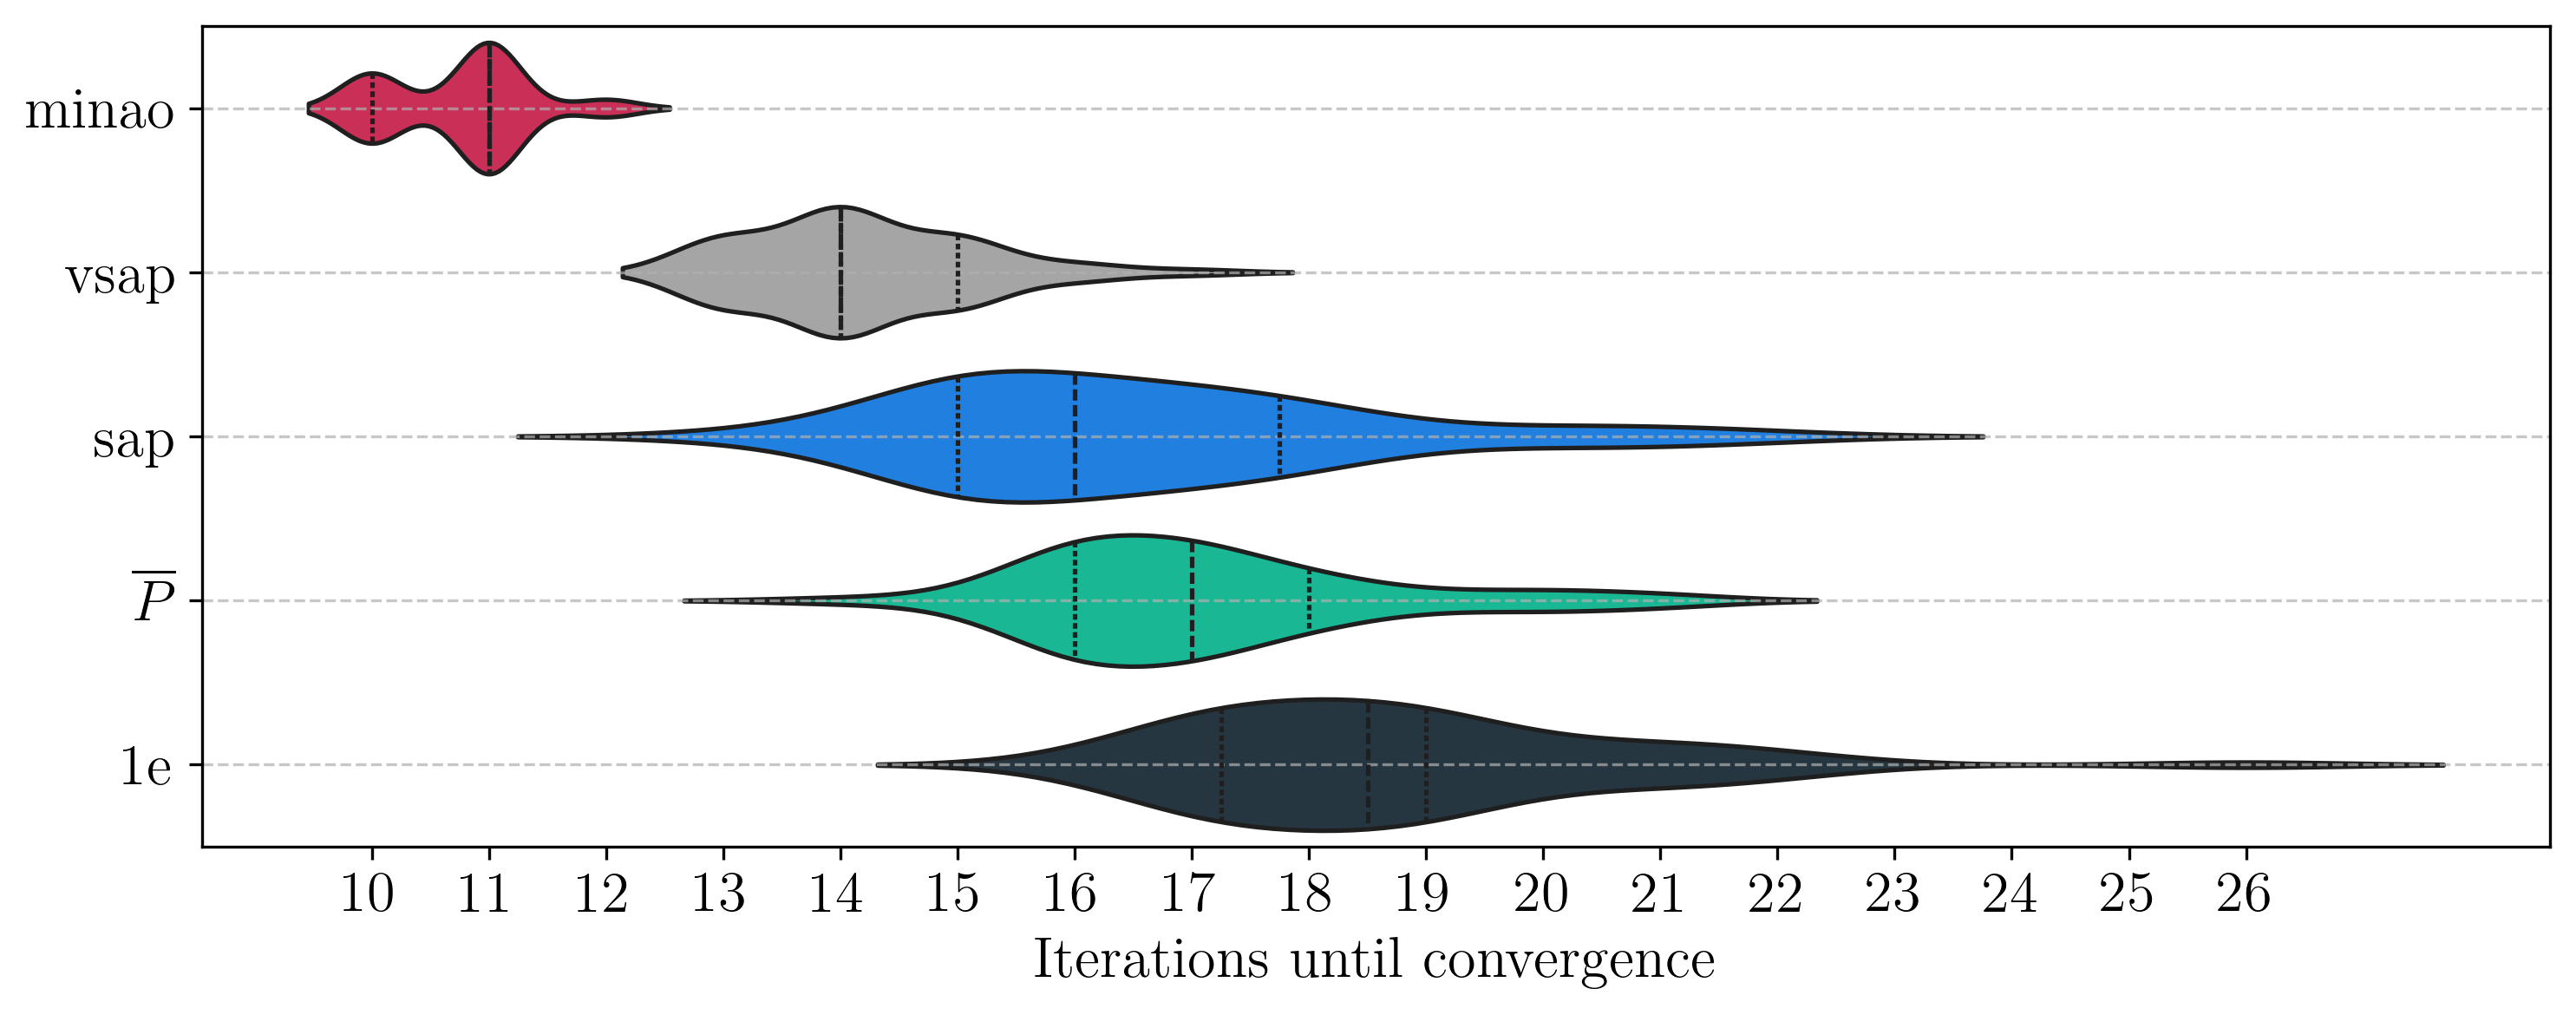

In [4]:
import seaborn as sns

plt.figure(figsize=(10, 4))
data = []
labels = []

for scheme, iterations in scheme_iterations.items():
    label = r"$\overline{P}$" if scheme == "0-D" else scheme
    data.append(iterations)
    labels.append(label)
    

# Violinplot
sns.violinplot(data=data, inner="quartile", orient="h")
plt.yticks(ticks=range(len(labels)), labels=labels)

plt.xticks(
    np.arange(10, max(max(d) for d in data) + 1, 1)
)
plt.xlabel("Iterations until convergence")
plt.grid()
plt.legend([],[], frameon=False)  # suppress default legend
plt.tight_layout()
plt.savefig("../../fig/gnn/0_d_model_iteration_count.pdf")

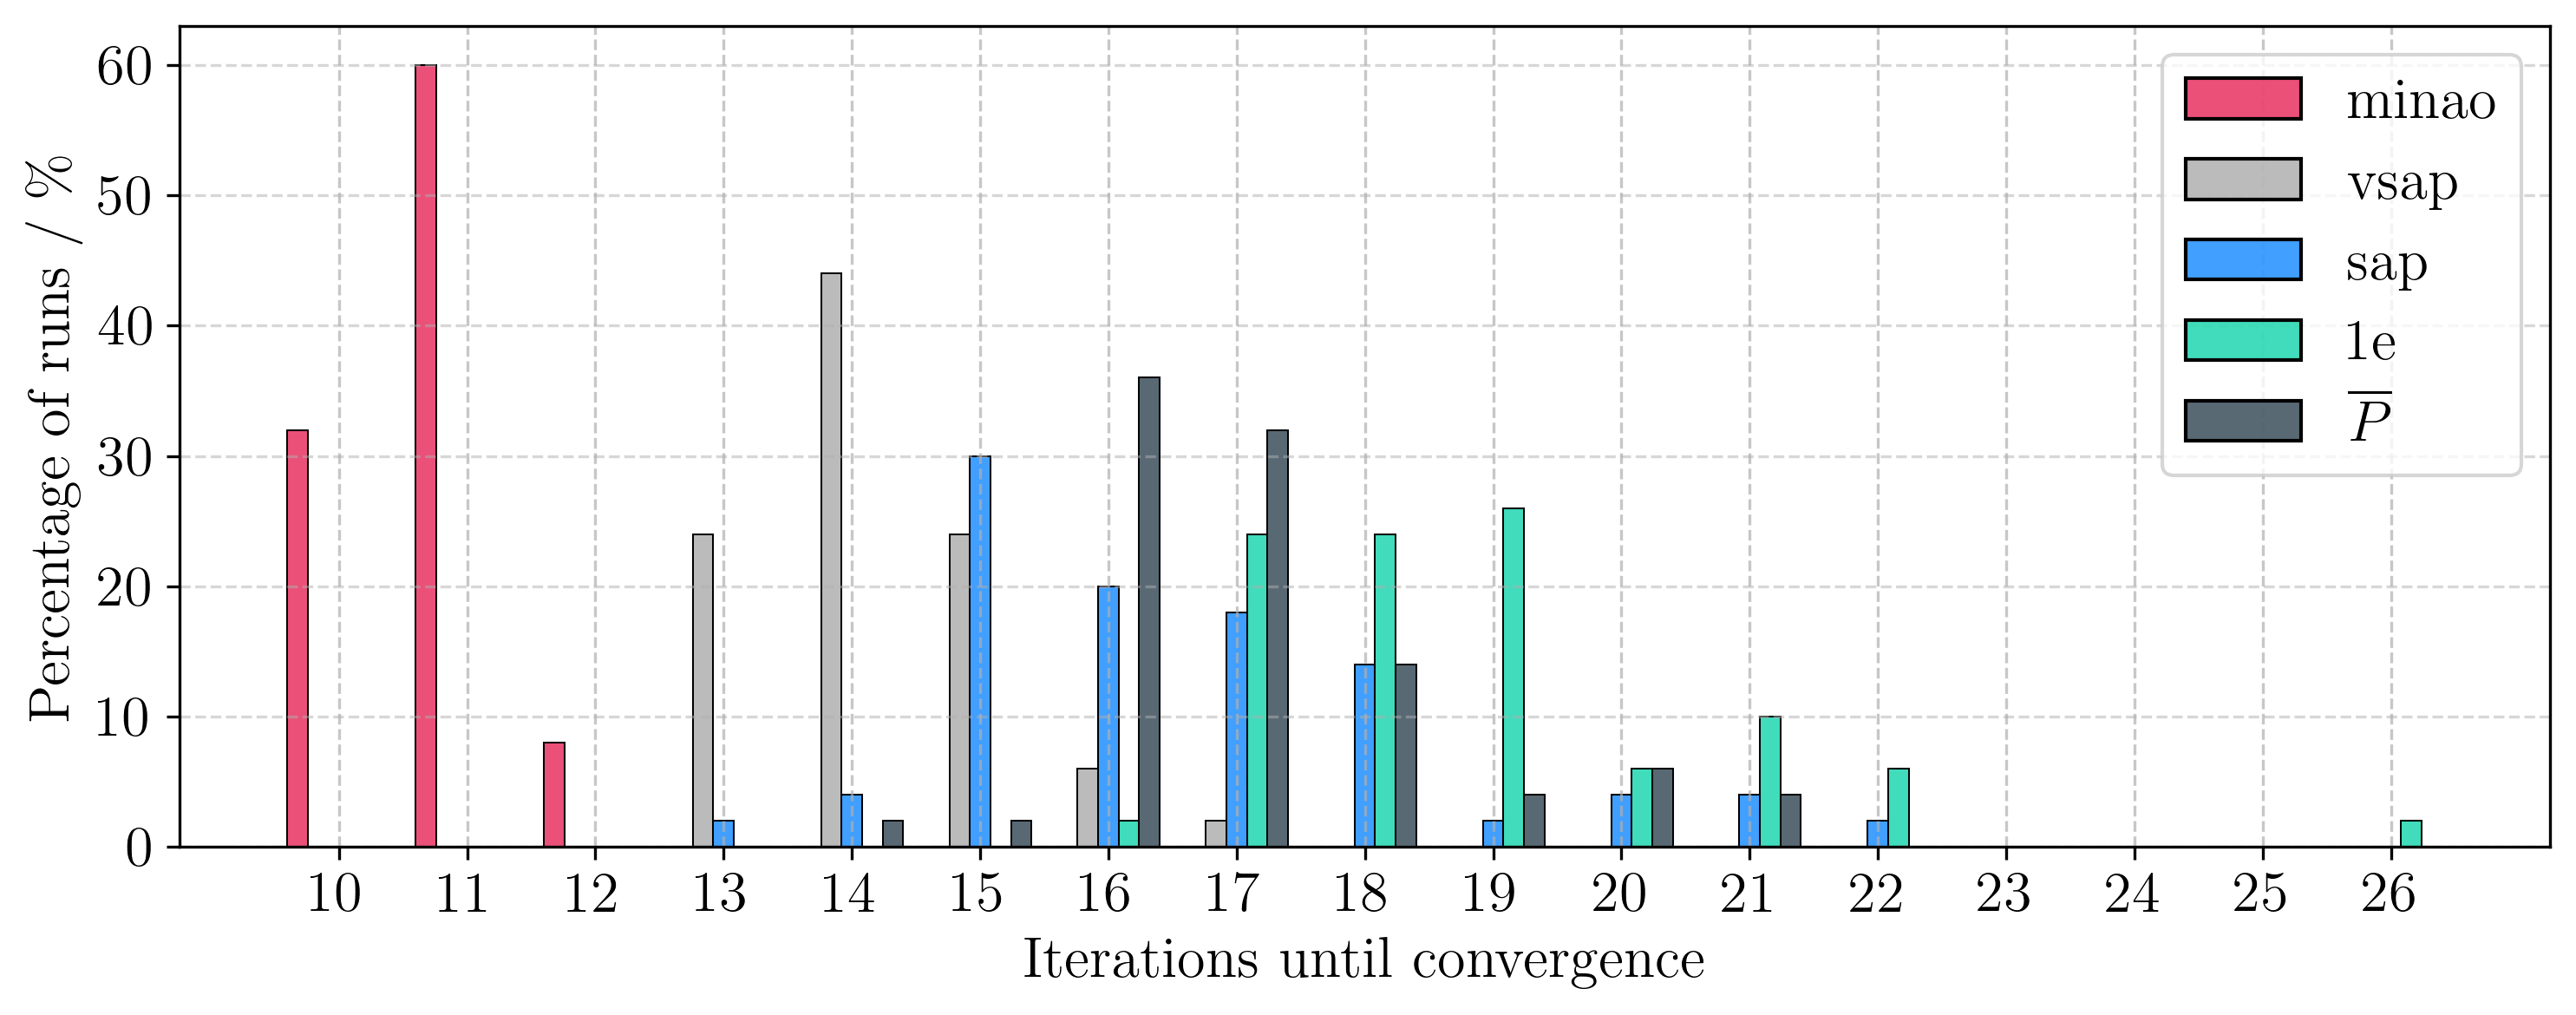

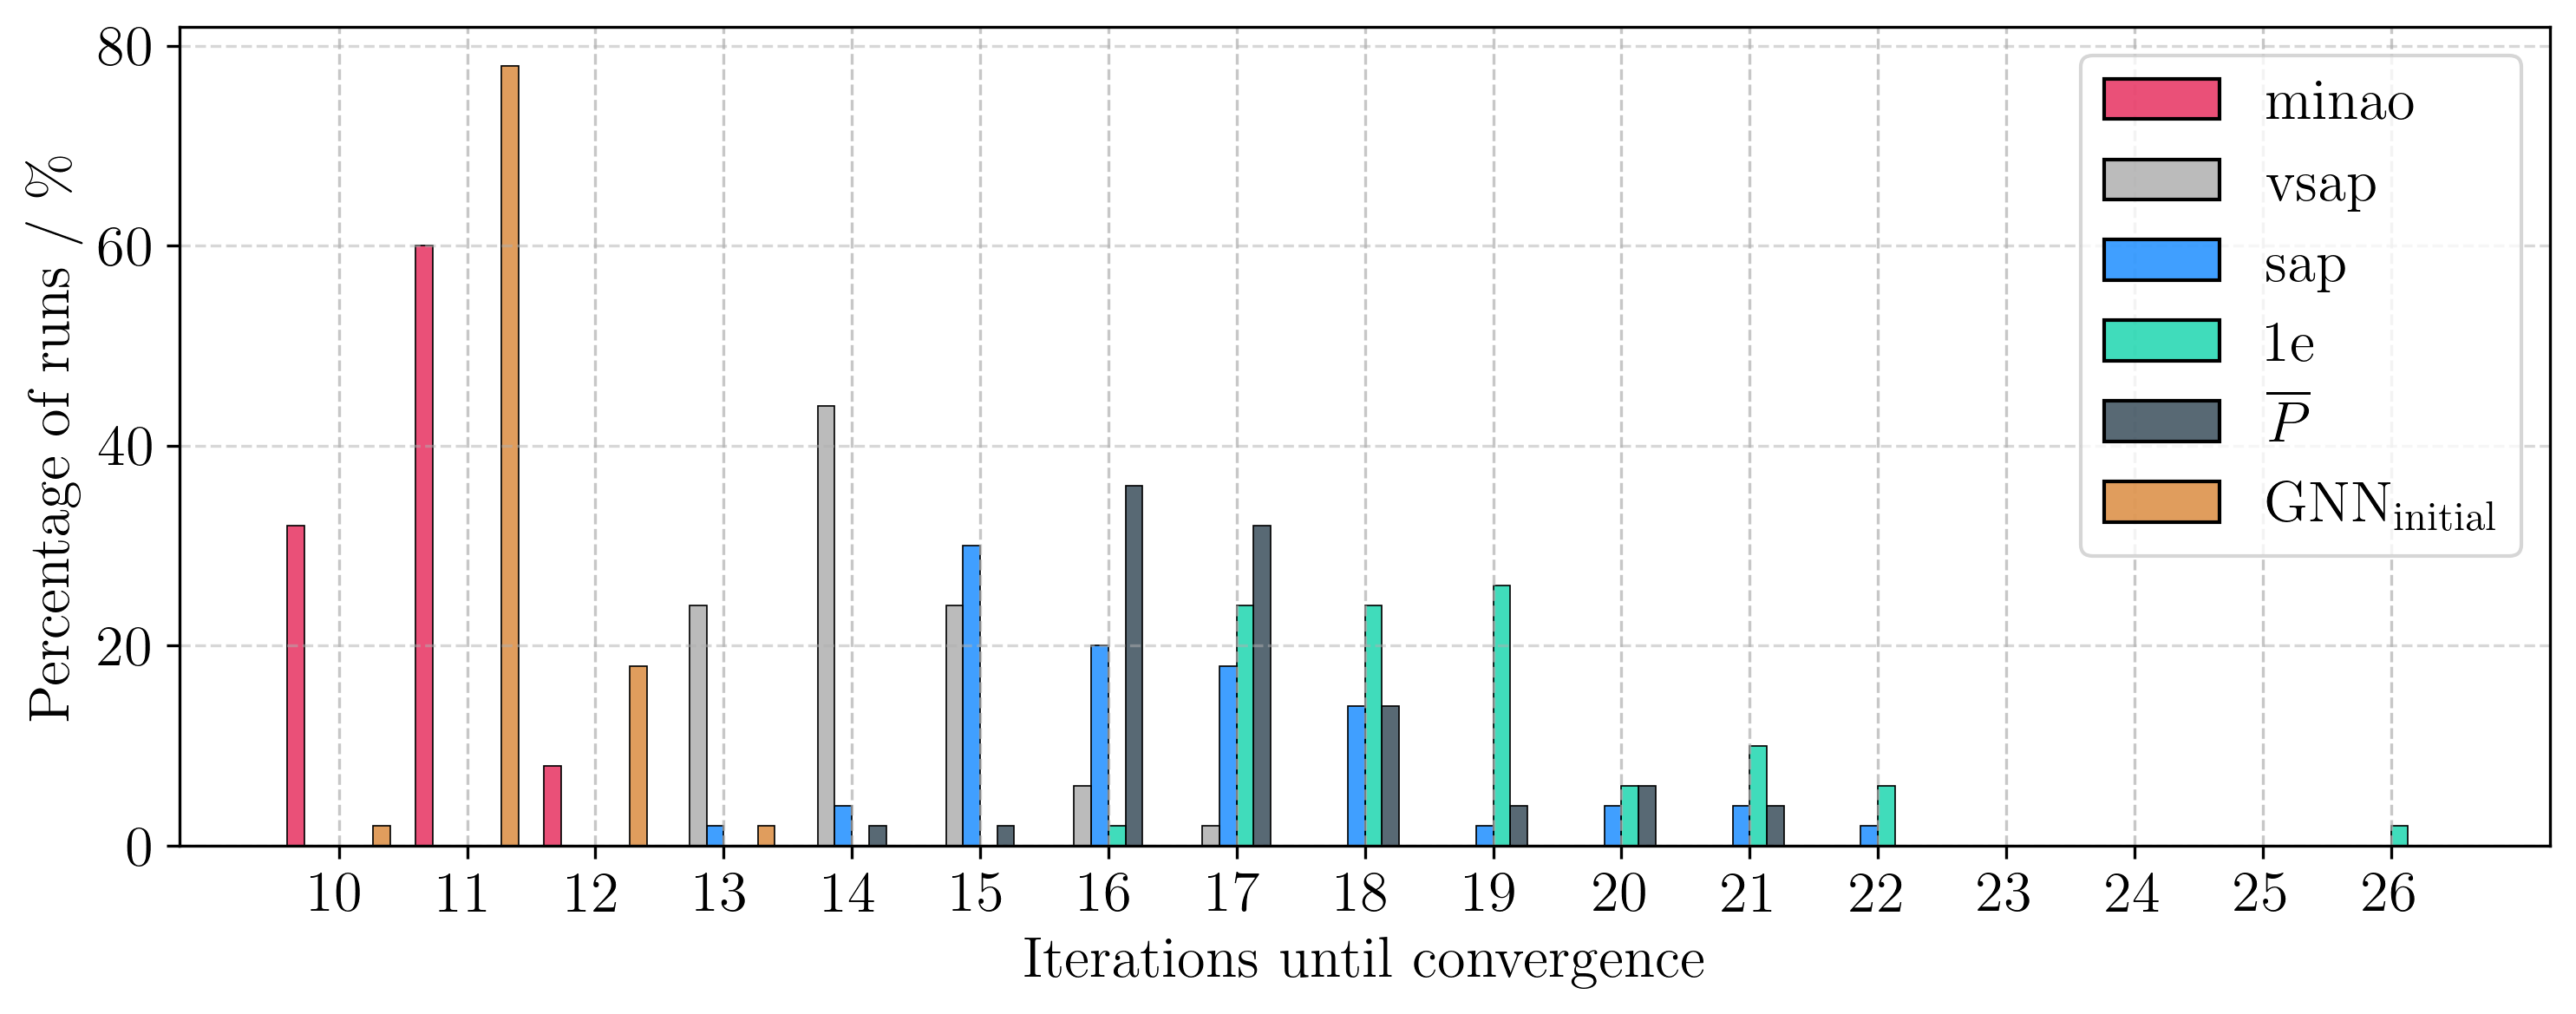

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

def multibar(data, savepath, xlabel="Iterations until convergence", ylabel="Percentage of runs / \%", full_xticks=True, max_x=None):
    plt.figure(figsize=(10, 4))

    # build a flat DataFrame of (scheme, iteration) pairs
    rows = []
    for scheme, iterations in data.items():
        if scheme == "0-D" or scheme == "GNN": 
            continue
        for it in iterations:
            rows.append({"scheme": scheme, "iteration": it})
    for own_keys, label in zip(["0-D", "GNN"], [r"$\overline{P}$", r"GNN$_\text{initial}$"]):
        try:
            for it in data[own_keys]:
                rows.append({"scheme": label, "iteration": it})
        except:
            pass
    df = pd.DataFrame(rows)
    if max_x:
        # map everything above to max_x
        df["iteration"] = df["iteration"].clip(upper=max_x)

    # grouped bar‐style histogram: one bar per scheme per iteration showing counts
    ax = sns.histplot(
        data=df,
        x="iteration",
        hue="scheme",
        multiple="dodge",    # side‐by‐side bars
        shrink=0.8,          # make bars a bit narrower
        binwidth=1,
        discrete=True,
        stat="percent",
        common_norm=False,
    )
    ax.legend_.set_title("")
    if full_xticks:
        plt.xticks(np.arange(df["iteration"].min(), df["iteration"].max() + 1, 1))
        
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(axis="y", linestyle="--", alpha=0.5)
    plt.tight_layout()
    plt.savefig(savepath)

multibar(scheme_iterations, savepath="../../fig/gnn/0_d_model_iteration_count_bar.pdf")
scheme_iterations.update(gnn_iterations)
multibar(scheme_iterations, savepath="../../fig/gnn/0_d_gnn_model_iteration_count_bar.pdf")

# SO Iteration comparision

In [6]:
res = None
with open("plot_data/second_order_pyscf.json", "r") as f:
    res = json.load(f)
with open("plot_data/second_order_own.json", "r") as f:
    res.update(json.load(f))


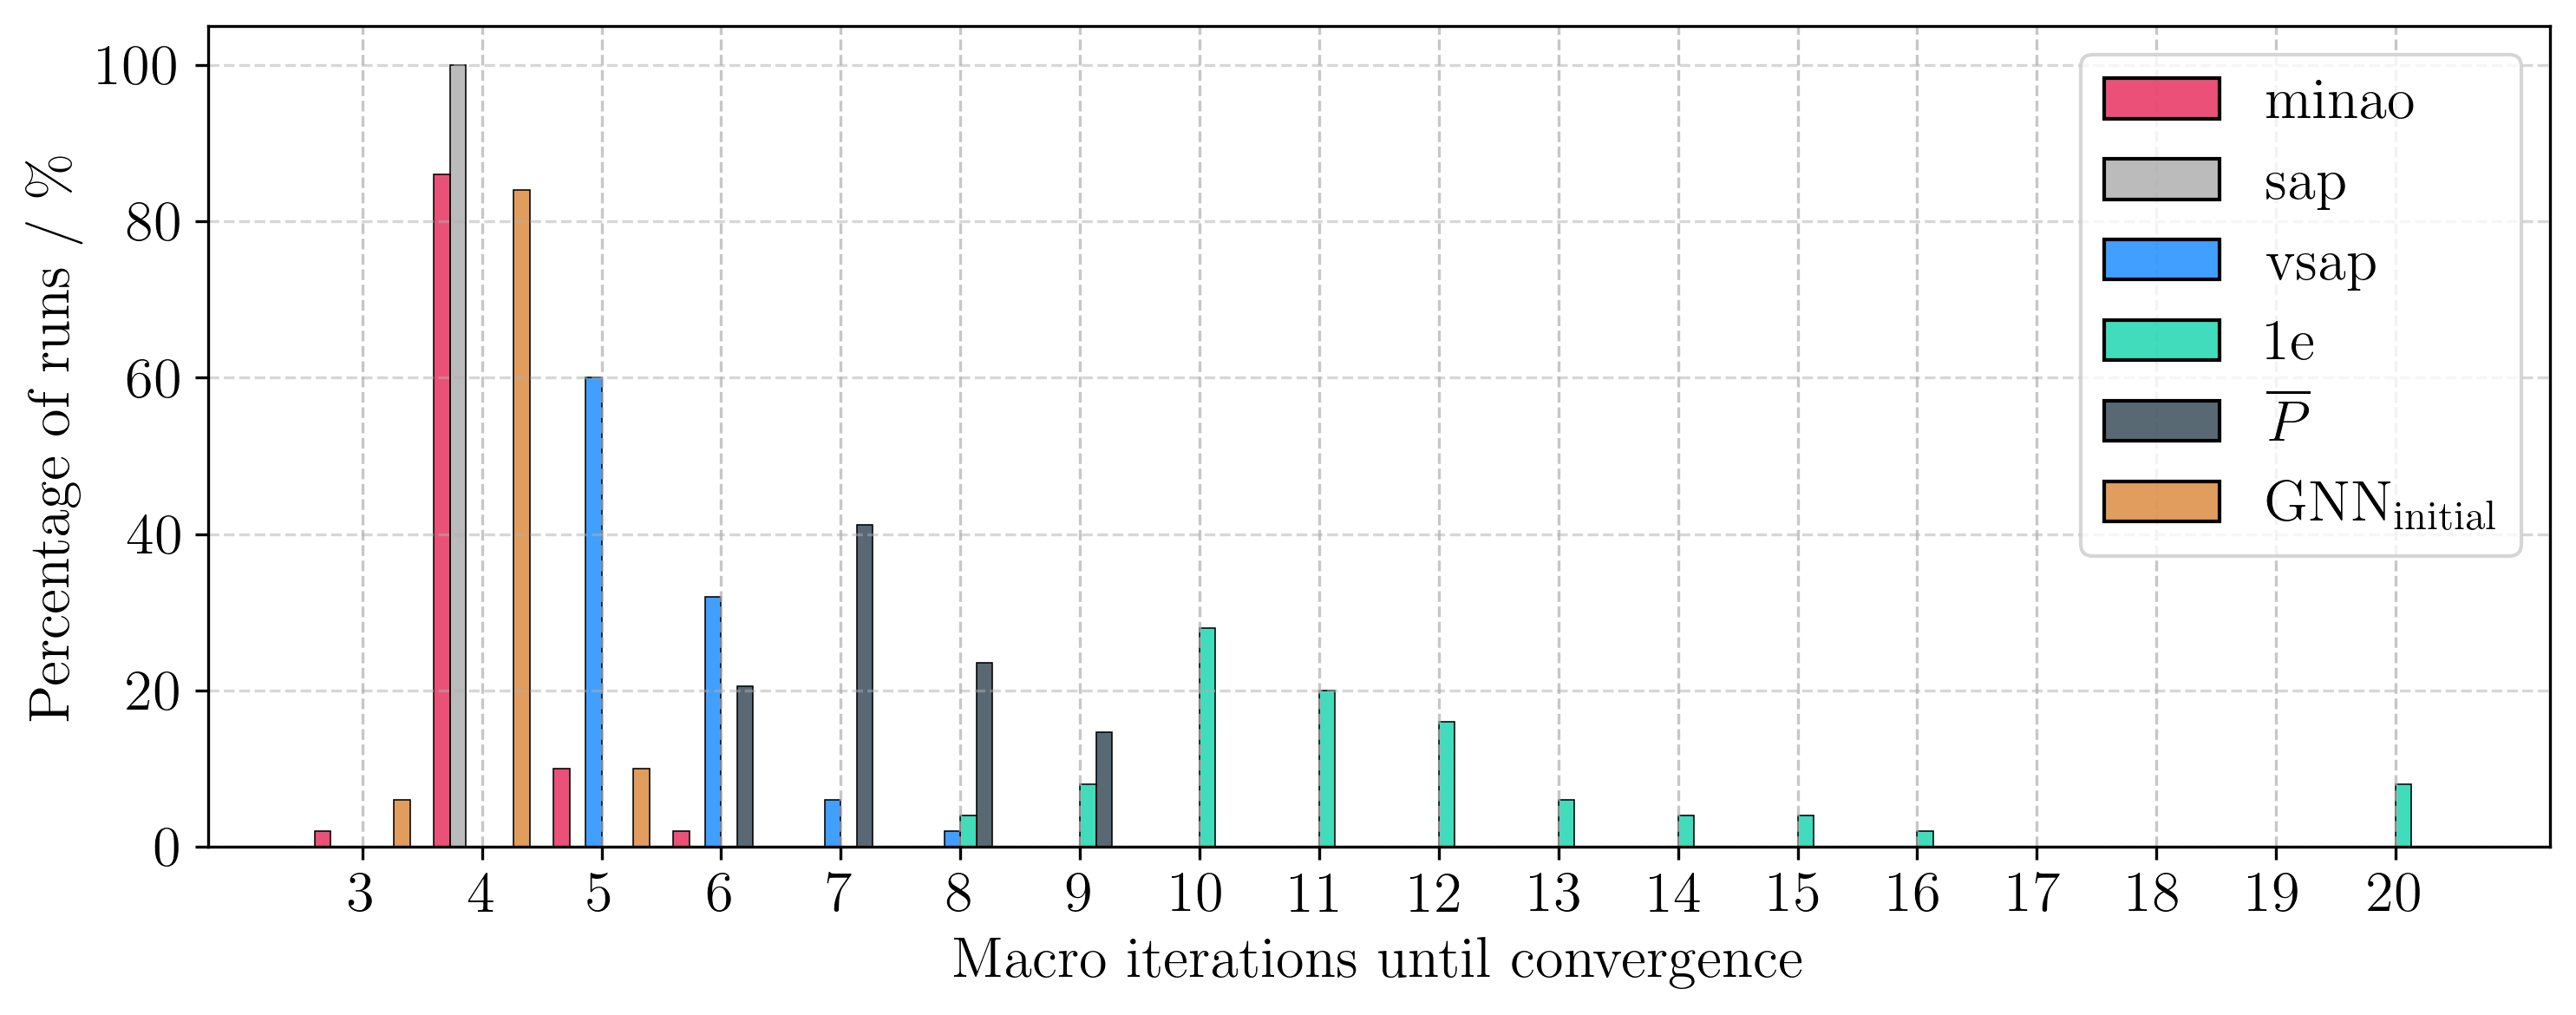

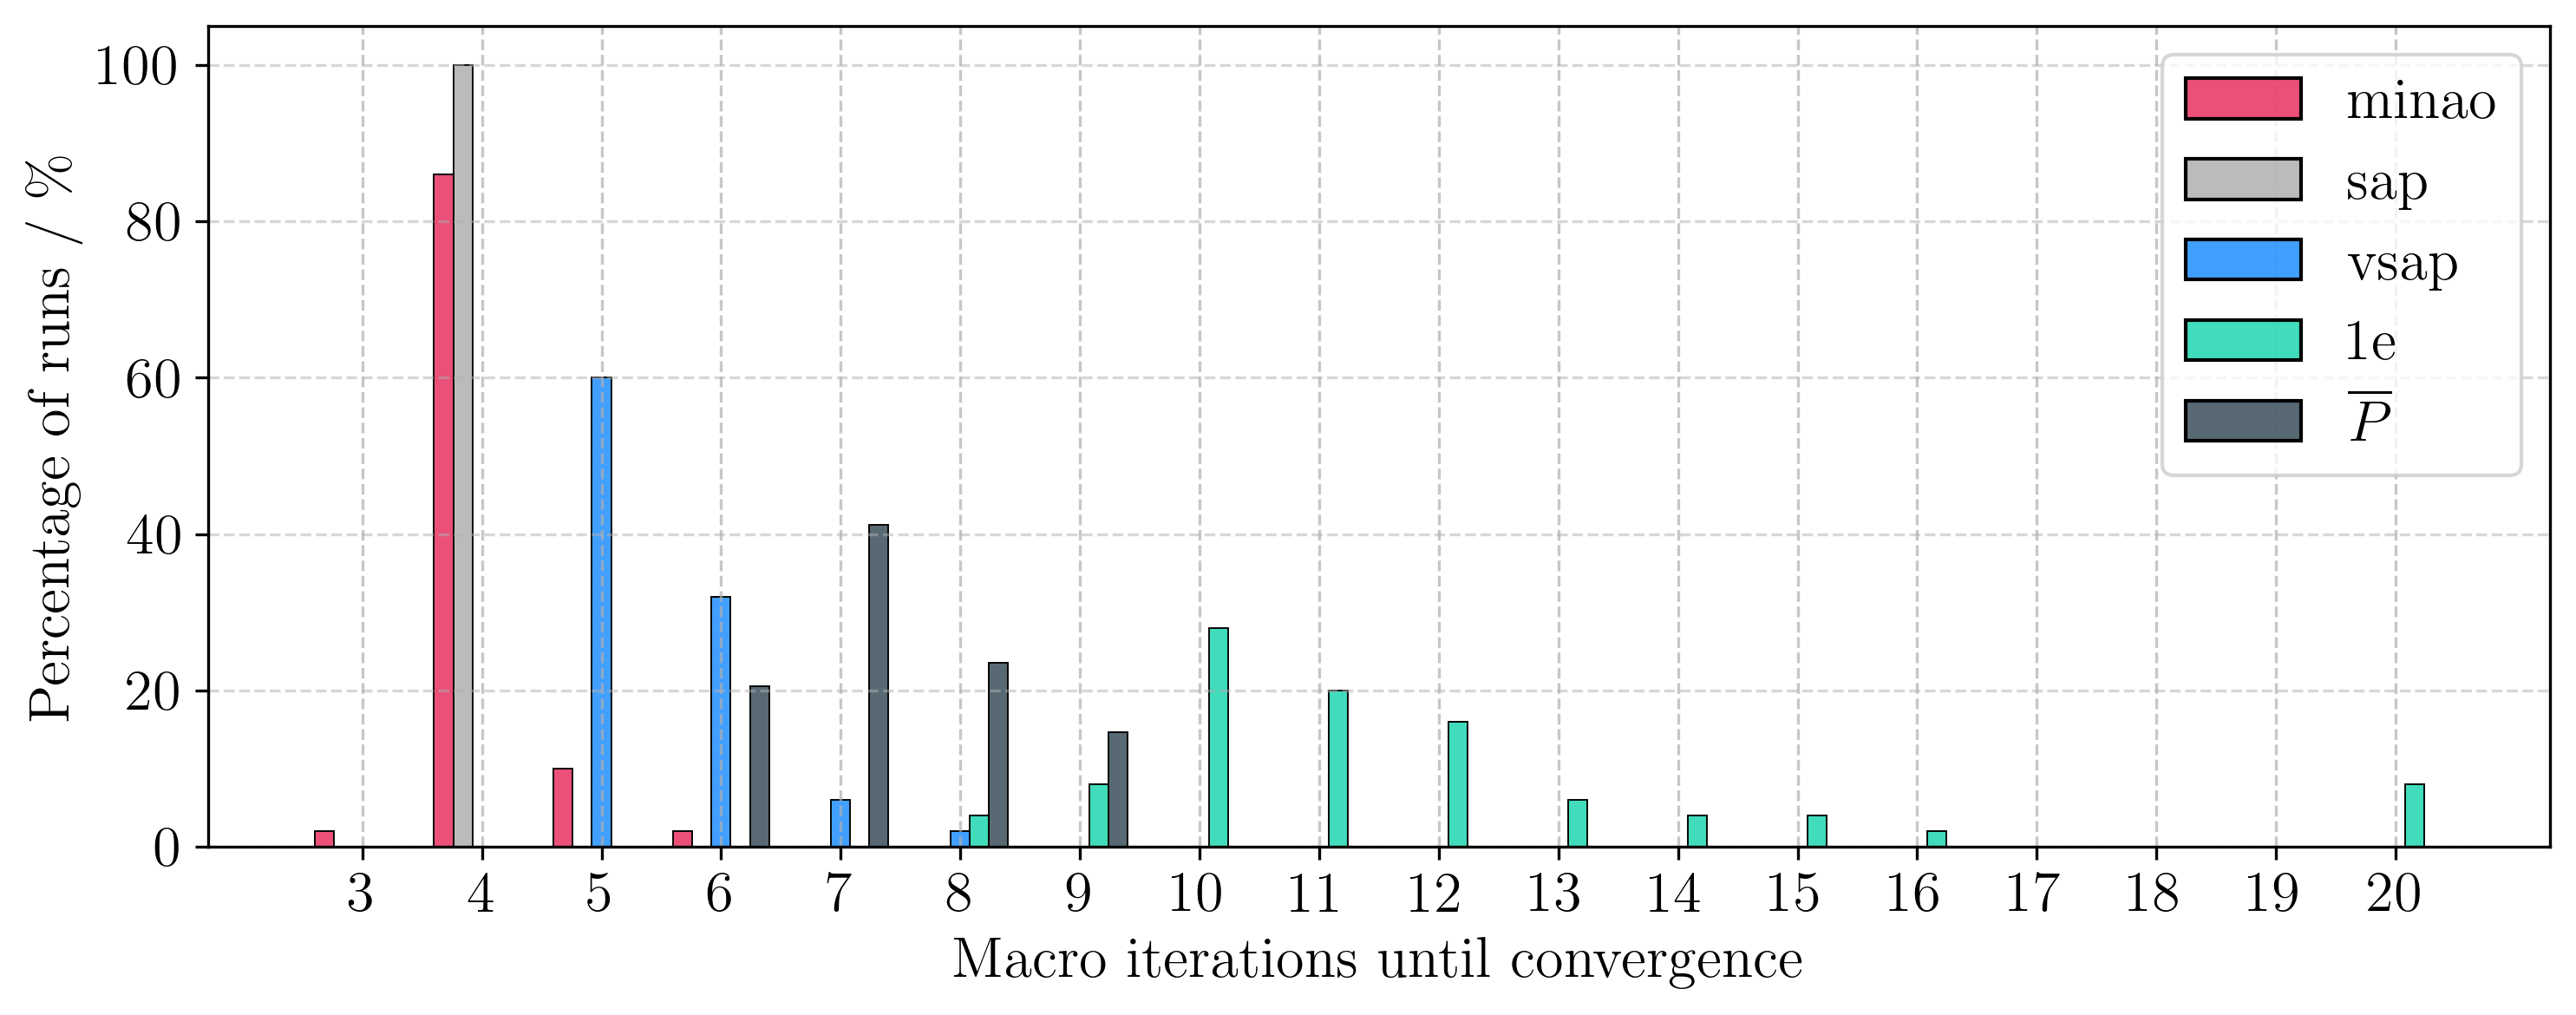

In [7]:
macro_iterations = {key: [len(val[0]) for val in vals] for key, vals in res.items()}
multibar(macro_iterations, xlabel="Macro iterations until convergence", savepath="../../fig/gnn/SO_0D_GNN_model_iteration_count_bar.pdf", max_x=20)
del macro_iterations["GNN"]
multibar(macro_iterations, xlabel="Macro iterations until convergence", savepath="../../fig/gnn/SO_0D_model_iteration_count_bar.pdf", max_x=20)



# Not fair - KF and JK builds

In [8]:
# add own back in 
with open("plot_data/second_order_own.json", "r") as f:
    res.update(json.load(f))
from pprint import pprint

Fock builds for various models
{'0-D': {'max': 114,
         'mean': 85.58823529411765,
         'min': 59,
         'std': 14.175616278871727},
 '1e': {'max': 374, 'mean': 166.1, 'min': 99, 'std': 55.94184480333125},
 'GNN': {'max': 42, 'mean': 30.68, 'min': 24, 'std': 4.154226763189511},
 'minao': {'max': 41, 'mean': 27.36, 'min': 23, 'std': 3.856215761598409},
 'sap': {'max': 30, 'mean': 26.78, 'min': 24, 'std': 1.6406096427852666},
 'vsap': {'max': 90, 'mean': 52.6, 'min': 39, 'std': 9.484724561103501}}


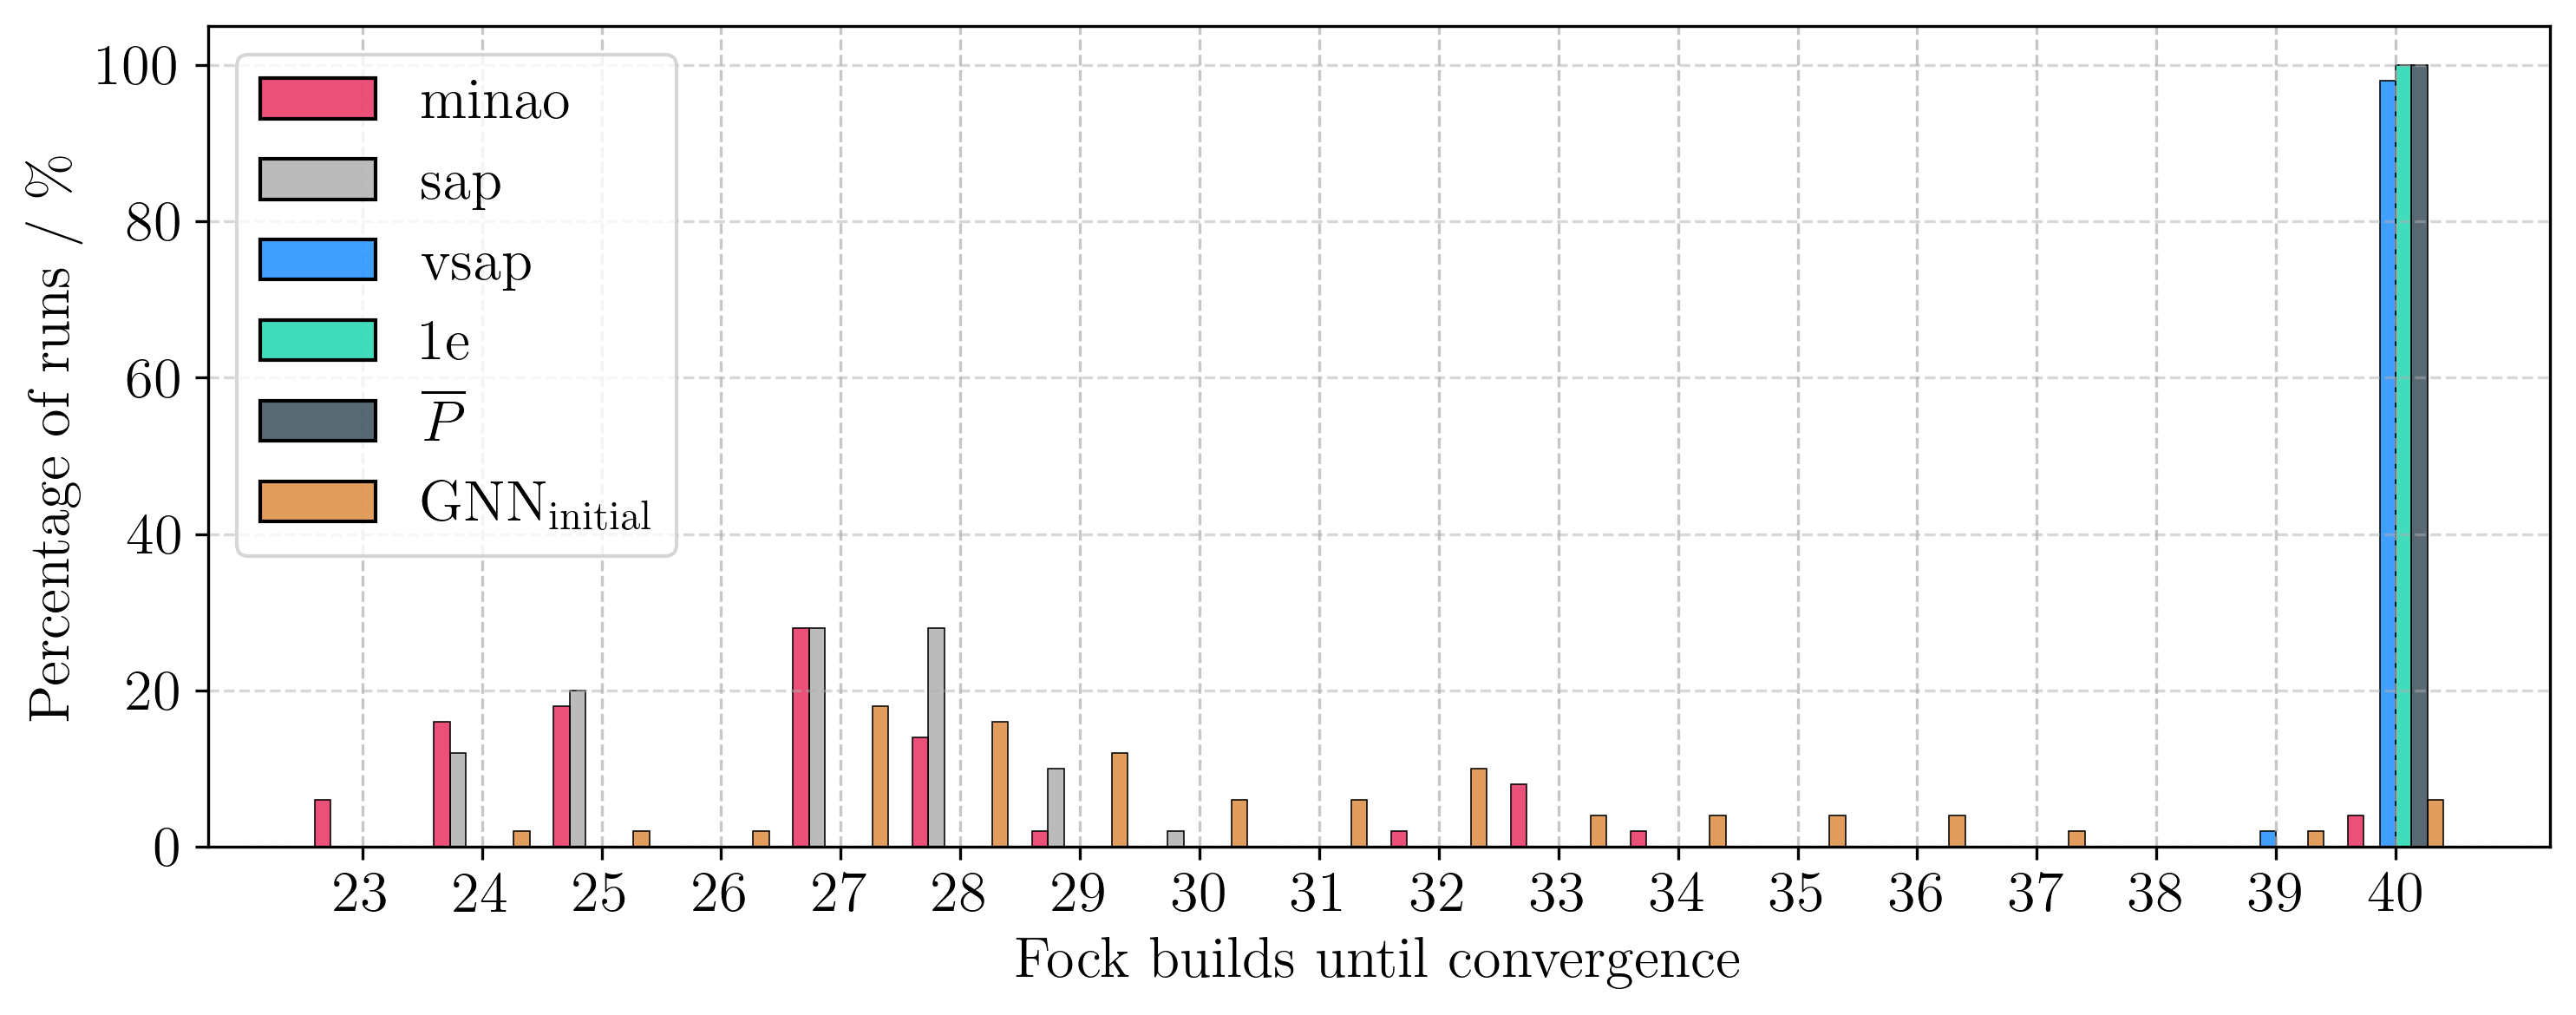

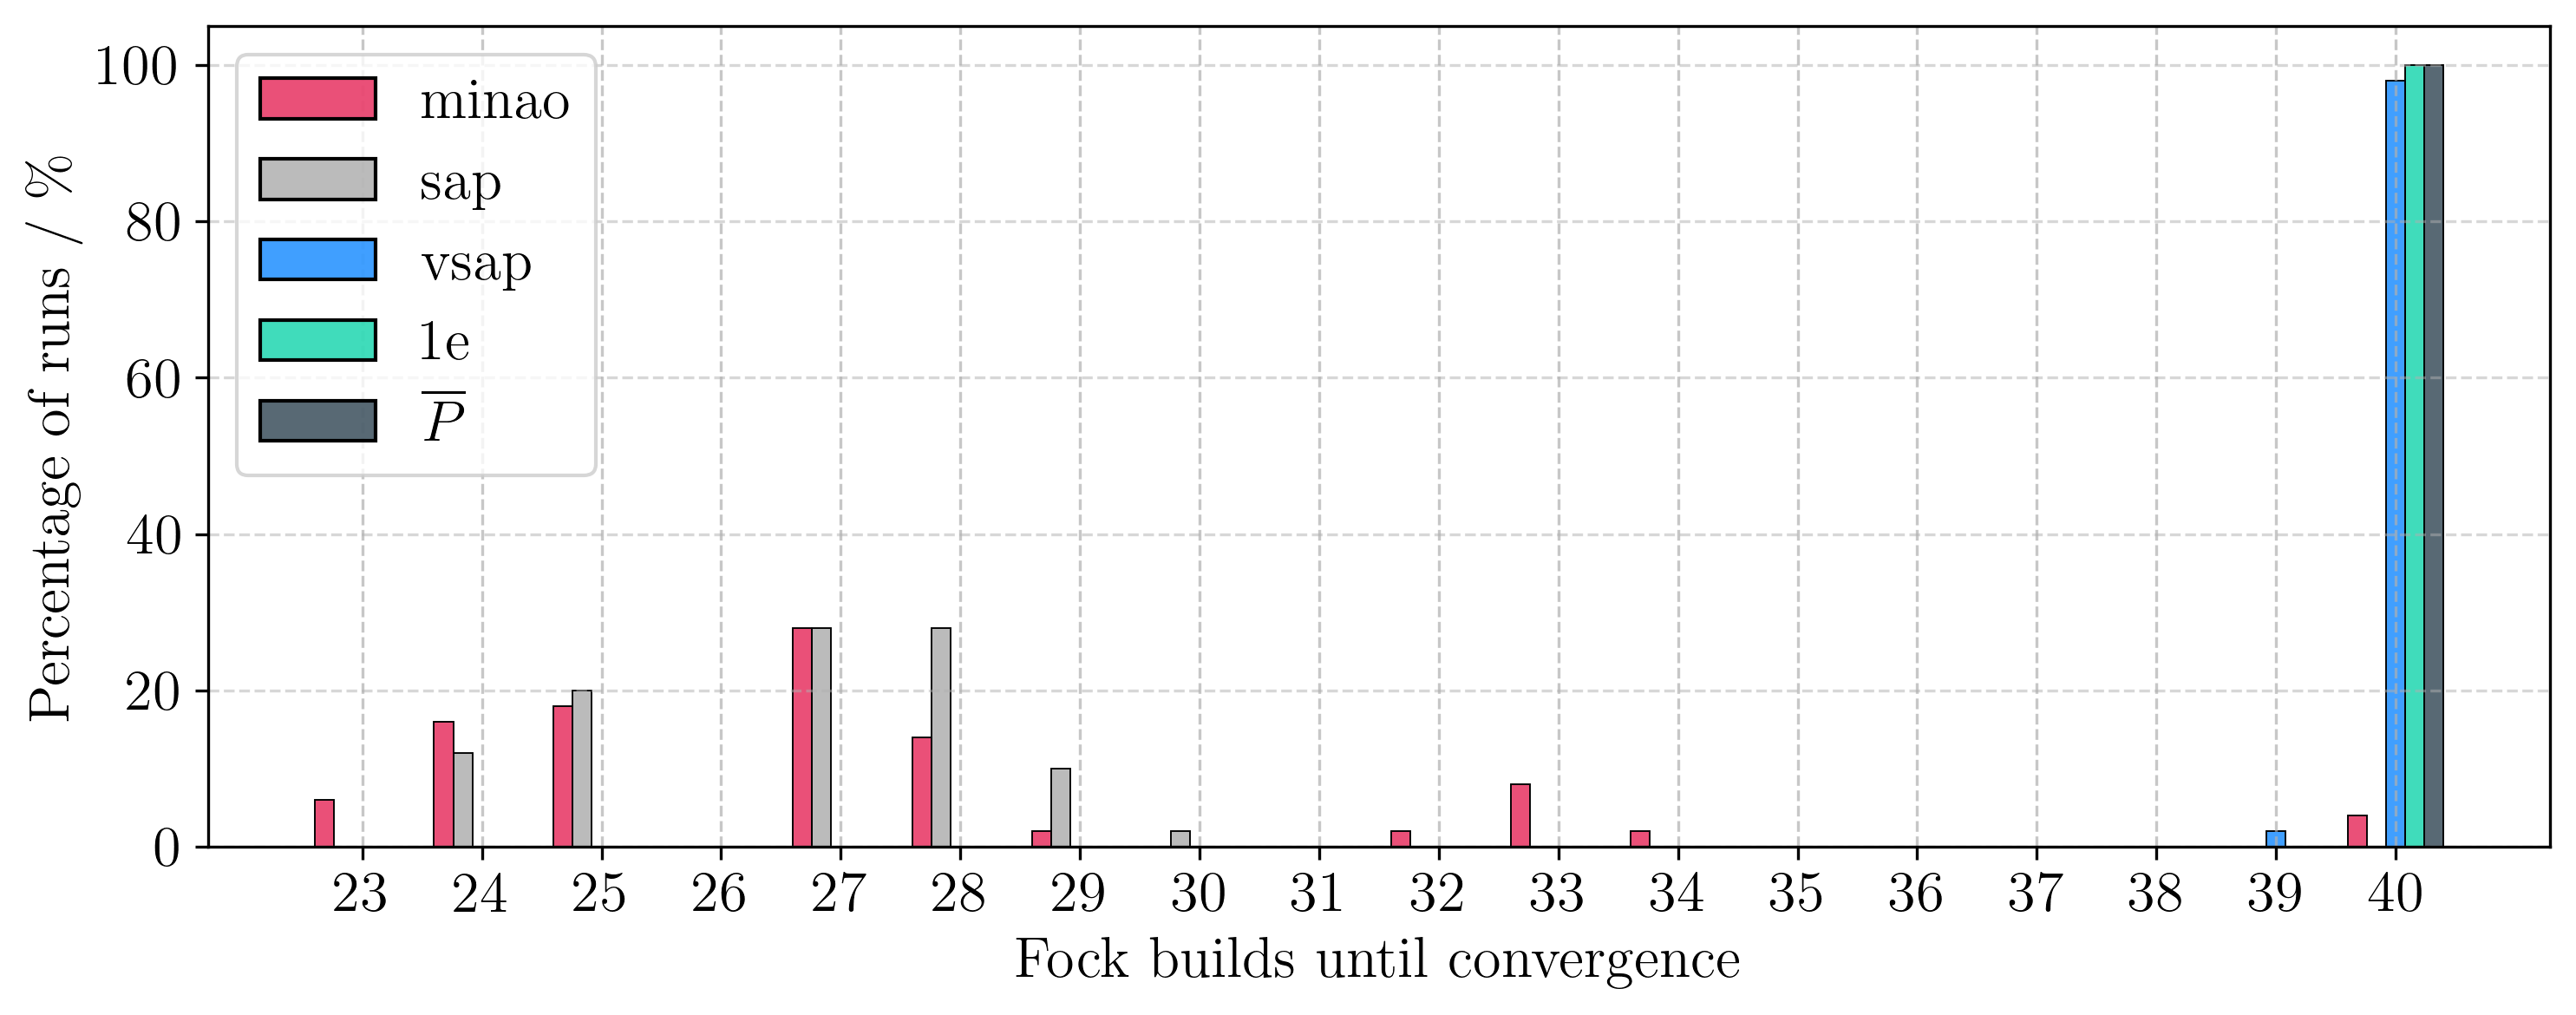

In [9]:
fock_build_count = {key: [sum(val[1]) for val in vals] for key, vals in res.items()}
fock_build_stats = {key: {"mean": np.mean(vals), "std": np.std(vals), "min": np.min(vals), "max": np.max(vals)} for key, vals in fock_build_count.items()}
print("Fock builds for various models")
pprint(fock_build_stats)
multibar(fock_build_count, savepath="../../fig/gnn/SO_0D_GNN_model_fock_build_count_bar.pdf", xlabel="Fock builds until convergence", full_xticks=True, max_x=40)
del fock_build_count["GNN"]
multibar(fock_build_count, savepath="../../fig/gnn/SO_0D_model_fock_build_count_bar.pdf", xlabel="Fock builds until convergence", full_xticks=True, max_x=40)